In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# DataSet 

In [3]:
covid = pd.read_excel('Covid-19 15.01.2022.xlsx')

In [4]:
covid

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,15 OCAK 2022,NaN,NaN,NaN,NaN,NaN,NaN,63967.0,NaN,384263.0,177.0,52016.0
1,14 OCAK 2022,NaN,NaN,NaN,NaN,NaN,NaN,67857.0,NaN,392438.0,167.0,56256.0
2,13 OCAK 2022,NaN,NaN,NaN,NaN,NaN,NaN,75564.0,NaN,410116.0,153.0,51675.0
3,12 OCAK 2022,NaN,NaN,NaN,NaN,NaN,NaN,77722.0,NaN,422028.0,145.0,42573.0
4,11 OCAK 2022,NaN,NaN,NaN,NaN,NaN,NaN,74266.0,NaN,430253.0,137.0,39226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
671,15 MART 2020,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
672,14 MART 2020,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,13 MART 2020,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,12 MART 2020,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
covid = covid.fillna(0)

In [6]:
covid[covid['Tarih'] == '10 ARALIK 2020']

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
401,10 ARALIK 2020,20500579.0,1748567.0,15751.0,"3,1",5943.0,452593.0,30424.0,5918.0,206202.0,220.0,5232.0


In [7]:
covid_tr = covid[:402]

In [8]:
covid_tr

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,15 OCAK 2022,0.0,0.0,0.0,0,0.0,0.0,63967.0,0.0,384263.0,177.0,52016.0
1,14 OCAK 2022,0.0,0.0,0.0,0,0.0,0.0,67857.0,0.0,392438.0,167.0,56256.0
2,13 OCAK 2022,0.0,0.0,0.0,0,0.0,0.0,75564.0,0.0,410116.0,153.0,51675.0
3,12 OCAK 2022,0.0,0.0,0.0,0,0.0,0.0,77722.0,0.0,422028.0,145.0,42573.0
4,11 OCAK 2022,0.0,0.0,0.0,0,0.0,0.0,74266.0,0.0,430253.0,137.0,39226.0
...,...,...,...,...,...,...,...,...,...,...,...,...
397,14 ARALIK 2020,21284005.0,1866345.0,16646.0,"2,9",598.0,1631944.0,29617.0,5064.0,204289.0,229.0,28164.0
398,13 ARALIK 2020,21079716.0,1836728.0,16417.0,"3,1",5973.0,1603780.0,26919.0,5103.0,181199.0,218.0,22215.0
399,12 ARALIK 2020,20898517.0,1809809.0,16199.0,"3,1",5961.0,1581565.0,29136.0,5203.0,189065.0,222.0,20191.0
400,11 ARALIK 2020,20709452.0,1780673.0,15977.0,"3,1",5952.0,458109.0,32106.0,5607.0,208873.0,226.0,5516.0


In [9]:
df = covid_tr[['Toplam Vaka Sayısı', 'Bugünkü Vaka Sayısı']]

In [10]:
df

,Toplam Vaka Sayısı,Bugünkü Vaka Sayısı
0,0.0,63967.0
1,0.0,67857.0
2,0.0,75564.0
3,0.0,77722.0
4,0.0,74266.0
...,...,...
397,1866345.0,29617.0
398,1836728.0,26919.0
399,1809809.0,29136.0
400,1780673.0,32106.0


In [11]:
df = df[::-1]
df = df.reset_index(drop=True)

In [12]:
df

,Toplam Vaka Sayısı,Bugünkü Vaka Sayısı
0,1748567.0,30424.0
1,1780673.0,32106.0
2,1809809.0,29136.0
3,1836728.0,26919.0
4,1866345.0,29617.0
...,...,...
397,0.0,74266.0
398,0.0,77722.0
399,0.0,75564.0
400,0.0,67857.0


In [13]:
for i in range(df.shape[0]):
    if df.iloc[i]['Toplam Vaka Sayısı'] == 0:
        df.iloc[i]['Toplam Vaka Sayısı'] = int(float(df.iloc[i-1]['Toplam Vaka Sayısı'])) + int(float(df.iloc[i]['Bugünkü Vaka Sayısı']))

In [14]:
df.iloc[0]['Bugünkü Vaka Sayısı'] = 0

In [15]:
df = df[1:]

In [16]:
df = df.reset_index(drop = True)
df

,Toplam Vaka Sayısı,Bugünkü Vaka Sayısı
0,1780673.0,32106.0
1,1809809.0,29136.0
2,1836728.0,26919.0
3,1866345.0,29617.0
4,1898447.0,32102.0
...,...,...
396,9699526.0,74266.0
397,9777248.0,77722.0
398,9852812.0,75564.0
399,9920669.0,67857.0


In [17]:
df['ID'] = df.index

In [18]:
df

,Toplam Vaka Sayısı,Bugünkü Vaka Sayısı,ID
0,1780673.0,32106.0,0
1,1809809.0,29136.0,1
2,1836728.0,26919.0,2
3,1866345.0,29617.0,3
4,1898447.0,32102.0,4
...,...,...,...
396,9699526.0,74266.0,396
397,9777248.0,77722.0,397
398,9852812.0,75564.0,398
399,9920669.0,67857.0,399


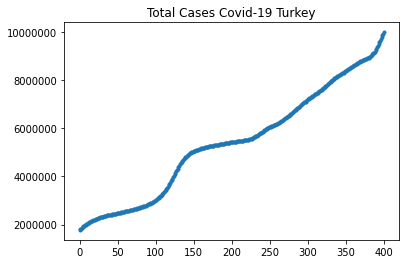

In [176]:
plt.figure()
plt.plot(np.array(df['ID']).reshape(-1,), np.array(df['Toplam Vaka Sayısı']), '.')
plt.title('Total Cases Covid-19 Turkey')
plt.ticklabel_format(style = 'plain')
plt.show()

# Linear Regression No shuffle

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [178]:
reg = LinearRegression().fit(X_train, y_train.reshape(-1,))

In [179]:
reg.score(X_train, y_train.reshape(-1,))

0.9544220846442706

In [180]:
reg.coef_

array([18160.43331639])

In [181]:
reg.intercept_

1685364.438078293

In [182]:
pred = reg.predict(X_train)

In [183]:
y_pred = reg.predict(X_test)

In [184]:
y_pred

array([6770285.76666667, 6788446.19998305, 6806606.63329944,
       6824767.06661583, 6842927.49993221, 6861087.9332486 ,
       6879248.36656499, 6897408.79988138, 6915569.23319776,
       6933729.66651415, 6951890.09983054, 6970050.53314692,
       6988210.96646331, 7006371.3997797 , 7024531.83309609,
       7042692.26641247, 7060852.69972886, 7079013.13304525,
       7097173.56636163, 7115333.99967802, 7133494.43299441,
       7151654.86631079, 7169815.29962718, 7187975.73294357,
       7206136.16625996, 7224296.59957634, 7242457.03289273,
       7260617.46620912, 7278777.8995255 , 7296938.33284189,
       7315098.76615828, 7333259.19947466, 7351419.63279105,
       7369580.06610744, 7387740.49942383, 7405900.93274021,
       7424061.3660566 , 7442221.79937299, 7460382.23268937,
       7478542.66600576, 7496703.09932215, 7514863.53263853,
       7533023.96595492, 7551184.39927131, 7569344.8325877 ,
       7587505.26590408, 7605665.69922047, 7623826.13253686,
       7641986.56585324,

In [185]:
r2_score(y_test, y_pred)

0.8227409238204726

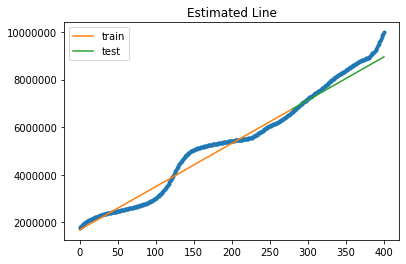

In [186]:
plt.figure()
plt.plot(X, y.reshape(-1,), '.')
plt.plot(X_train, pred, label='train')
plt.plot(X_test, y_pred, label='test')
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line')
plt.legend()
plt.show()

The data contains everything from 10 Decemnber 2020 to 16 Janurary 2022. Linear Regression got a r2 score of 0.8227409238204726

# Linear Regression With Shuffle

In [226]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [228]:
reg = LinearRegression().fit(X_train, y_train.reshape(-1,))

In [229]:
reg.score(X_train, y_train.reshape(-1,))

0.9832864394166422

In [230]:
reg.coef_

array([19238.06736067])

In [231]:
reg.intercept_

1537541.2171033504

In [232]:
pred = reg.predict(X_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.9799774956121751

In [233]:
pred = np.sort(pred, axis=0)
y_pred = np.sort(y_pred, axis = 0)

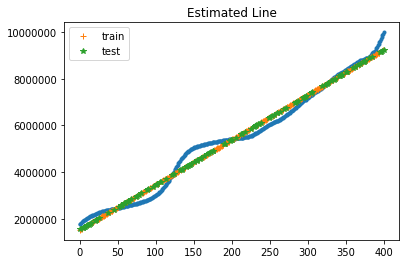

In [234]:
plt.figure()
plt.plot(X, y.reshape(-1,), '.')
plt.plot(np.sort(X_train, axis=0), pred, '+', label='train')
plt.plot(np.sort(X_test, axis=0), y_pred, '*', label='test')
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line')
plt.legend()
plt.show()

# SVR (Support Vector Regression)

In [66]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [67]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [69]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train)

In [70]:
svr = SVR(C=60.0, epsilon=0.5)
svr.fit(X_train_scaled, y_train_scaled.reshape(-1,))

SVR(C=60.0, epsilon=0.5)

In [71]:
svr.score(X_train_scaled, y_train_scaled.reshape(-1,))

0.8717245477433817

In [72]:
X_train.shape

(280, 1)

In [73]:
pred = svr.predict(X_train_scaled)

In [74]:
pred = sc_y.inverse_transform(pred.reshape(-1,1))

In [75]:
X_test_scaled = sc_X.fit_transform(X_test)

In [ ]:
y_pred = svr.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))
y_pred

In [77]:
r2_score(y_test, y_pred)

-20.940741025014486

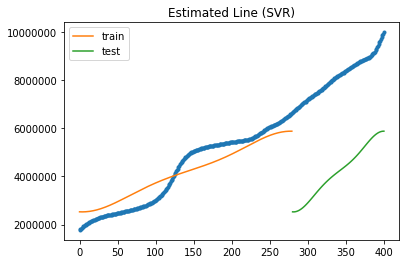

In [78]:
plt.plot(X, y.reshape(-1,), '.')
plt.plot(X_train, pred, label='train')
plt.plot(X_test, y_pred, label='test')
#plt.scatter(X_train, y_train.reshape(-1,), color = 'red')
#plt.plot(X_train, y_pred, color = 'blue')  
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (SVR)')
plt.legend()
plt.show()

# SVR with Shuffle

In [285]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [286]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [288]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.fit_transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train)
y_test_scaled = sc_y.fit_transform(y_test)
X_scaled = sc_y.fit_transform(X)
y_scaled = sc_y.fit_transform(y)

In [289]:
svr = SVR(C=60.0, epsilon=0.5)
svr.fit(X_train_scaled, y_train_scaled.reshape(-1,))

SVR(C=60.0, epsilon=0.5)

In [290]:
svr.score(X_train_scaled, y_train_scaled.reshape(-1,))

0.9454835634696644

In [291]:
X_train.shape

(280, 1)

In [292]:
pred = svr.predict(X_train_scaled)
y_pred = svr.predict(X_test_scaled)
r2_score(y_test_scaled, y_pred)

0.9427913142621536

In [293]:
pred = np.sort(pred, axis=0)
y_pred = np.sort(y_pred, axis = 0)

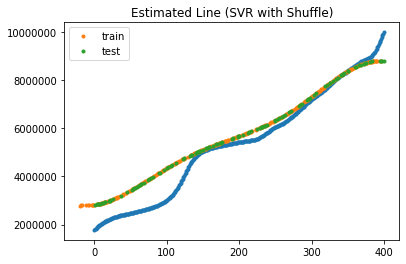

In [296]:
plt.figure()
plt.plot(X, y.reshape(-1,), '.')
plt.plot(sc_X.inverse_transform(np.sort(X_train_scaled, axis=0)), sc_y.inverse_transform(pred.reshape(-1,1)), '.', label='train')
plt.plot(sc_X.inverse_transform(np.sort(X_test_scaled, axis=0)), sc_y.inverse_transform(y_pred.reshape(-1,1)), '.', label='test')
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (SVR with Shuffle)')
plt.legend()
plt.show()

As we can see it here The SVR has a better estimated line than the linear regression with a r2 score of 0.9913231277761603.

# Random Forest

In [142]:
from sklearn.ensemble import RandomForestRegressor

In [143]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [145]:
random_forest = RandomForestRegressor(n_estimators = 10, random_state=0)

In [146]:
random_forest.fit(X_train, y_train.reshape(-1,))

RandomForestRegressor(n_estimators=10, random_state=0)

In [147]:
pred = random_forest.predict(X_train)
y_pred = random_forest.predict(X_test)

In [85]:
y_pred

array([6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 6620700.,
       6620700., 6620700., 6620700., 6620700., 6620700., 66207

In [ ]:
y_pred

In [86]:
r2_score(y_test, y_pred)

-3.2122362621750167

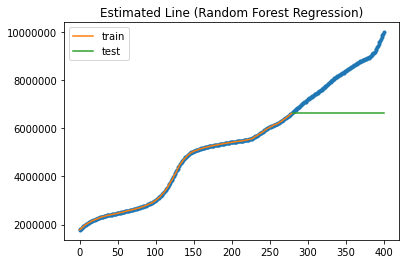

In [87]:
plt.plot(X, y.reshape(-1,), '.')
plt.plot(X_train, pred, label='train')
plt.plot(X_test, y_pred, label='test')
#plt.scatter(X_train, y_train.reshape(-1,), color = 'red')
#plt.plot(X_train, y_pred, color = 'blue')  
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (Random Forest Regression)')
plt.legend()
plt.show()

With a r2 score of 0.999881941991274 Random Forest Regressor surpasses the Support Vector Machine and Linear Regression.

# Random Forest With Shuffle

In [259]:
from sklearn.ensemble import RandomForestRegressor

In [260]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [268]:
random_forest = RandomForestRegressor(n_estimators = 10, random_state=0)

In [269]:
random_forest.fit(X_train, y_train.reshape(-1,))

RandomForestRegressor(n_estimators=10, random_state=0)

In [270]:
pred = random_forest.predict(X_train)
y_pred = random_forest.predict(X_test)
r2_score(y_test, y_pred)

0.999881941991274

In [271]:
pred = np.sort(pred, axis=0)
y_pred = np.sort(y_pred, axis = 0)

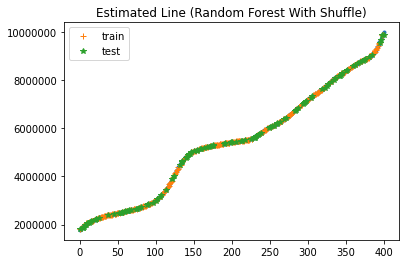

In [273]:
plt.figure()
plt.plot(X, y.reshape(-1,), '.')
plt.plot(np.sort(X_train, axis=0), pred, '+', label='train')
plt.plot(np.sort(X_test, axis=0), y_pred, '*', label='test')
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (Random Forest With Shuffle)')
plt.legend()
plt.show()

# Gradient Boosting Regression

In [88]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [91]:
gradient_boosting = GradientBoostingRegressor(random_state=0)

In [92]:
gradient_boosting.fit(X_train, y_train.reshape(-1,))

GradientBoostingRegressor(random_state=0)

In [93]:
y_pred = gradient_boosting.predict(X_test)
y_pred

array([6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276, 6626722.38710276, 6626722.38710276,
       6626722.38710276,

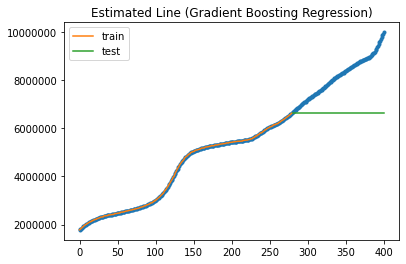

In [94]:
pred = gradient_boosting.predict(X_train)
plt.plot(X, y.reshape(-1,), '.')
plt.plot(X_train, pred, label='train')
plt.plot(X_test, y_pred, label='test')
#plt.scatter(X_train, y_train.reshape(-1,), color = 'red')
#plt.plot(X_train, y_pred, color = 'blue')  
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (Gradient Boosting Regression)')
plt.legend()
plt.show()

In [95]:
r2_score(y_test, y_pred)

-3.1867477199390564

With a r2 score of 0.999794076508534 Gradient Boosting Regression surpasses the Support Vector Machine and Linear Regression but falls behind of Random Forest Regressor.

# Gradient Boosting With Shuffle

In [297]:
from sklearn.ensemble import GradientBoostingRegressor

In [305]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [307]:
gradient_boosting = GradientBoostingRegressor(random_state=0)

In [308]:
gradient_boosting.fit(X_train, y_train.reshape(-1,))

GradientBoostingRegressor(random_state=0)

In [309]:
pred = gradient_boosting.predict(X_train)
y_pred = gradient_boosting.predict(X_test)
r2_score(y_test, y_pred)

0.999794076508534

In [310]:
pred = np.sort(pred, axis=0)
y_pred = np.sort(y_pred, axis = 0)

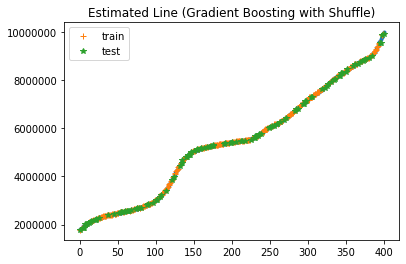

In [311]:
plt.figure()
plt.plot(X, y.reshape(-1,), '.')
plt.plot(np.sort(X_train, axis=0), pred, '+', label='train')
plt.plot(np.sort(X_test, axis=0), y_pred, '*', label='test')
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (Gradient Boosting with Shuffle)')
plt.legend()
plt.show()

# XG Boost

In [335]:
import xgboost as xg
from sklearn.multioutput import MultiOutputRegressor

In [336]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [338]:
xgboost = xg.XGBRegressor(objective='reg:squarederror', n_estimators = 1000, max_depth=7, eta=0.1, subsample=0.7)

In [339]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [340]:
y_pred = xgboost.predict(X_test)
y_pred

array([6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 6629134.,
       6629134., 6629134., 6629134., 6629134., 6629134., 66291

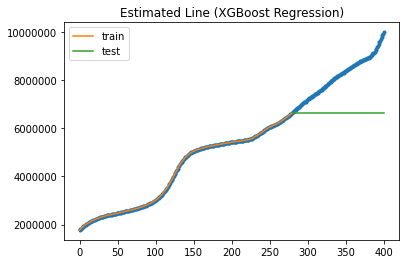

In [341]:
pred = xgboost.predict(X_train)
plt.plot(X, y.reshape(-1,), '.')
plt.plot(X_train, pred, label='train')
plt.plot(X_test, y_pred, label='test')
#plt.scatter(X_train, y_train.reshape(-1,), color = 'red')
#plt.plot(X_train, y_pred, color = 'blue')  
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (XGBoost Regression)')
plt.legend()
plt.show()

In [103]:
r2_score(y_test, y_pred)

-5.246467556118023

# XG Boost with Shuffle

In [312]:
import xgboost as xg
from sklearn.multioutput import MultiOutputRegressor

In [313]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [321]:
xgboost = xg.XGBRegressor(objective='reg:squarederror', n_estimators = 1000, max_depth=7, eta=0.1, subsample=0.7)

In [322]:
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [323]:
pred = xgboost.predict(X_train)
y_pred = xgboost.predict(X_test)
r2_score(y_test, y_pred)

0.9996347927661675

In [324]:
pred = np.sort(pred, axis=0)
y_pred = np.sort(y_pred, axis = 0)

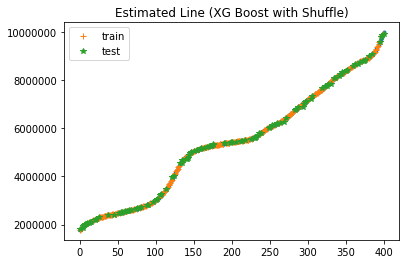

In [326]:
plt.figure()
plt.plot(X, y.reshape(-1,), '.')
plt.plot(np.sort(X_train, axis=0), pred, '+', label='train')
plt.plot(np.sort(X_test, axis=0), y_pred, '*', label='test')
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (XG Boost with Shuffle)')
plt.legend()
plt.show()

With a r2 score of 0.9901100998364135 XG Boost falls behind of Gradient Boosting Regression, Random Forest Regressor and SVR but surpasses the Linear Regression.

# RANSAC Regressor

In [342]:
from sklearn.linear_model import RANSACRegressor

In [343]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [344]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

In [345]:
reg = RANSACRegressor(random_state=0).fit(X_train, y_train)

In [346]:
y_pred = reg.predict(X_test)

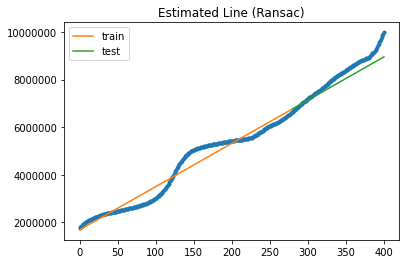

In [347]:
pred = reg.predict(X_train)
plt.plot(X, y.reshape(-1,), '.')
plt.plot(X_train, pred, label='train')
plt.plot(X_test, y_pred, label='test')
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (Ransac)')
plt.legend()
plt.show()

In [118]:
r2_score(y_test, y_pred)

0.8227409238204726

With a r2 score of 0.9799774956121751 RANSAC Regressor takes its place above XG Boost, Gaussian, Linear Regressions.

# Ransac with Shuffle

In [327]:
from sklearn.linear_model import RANSACRegressor

In [328]:
X = np.array(df['ID']).reshape(-1, 1)
y = np.array(df['Toplam Vaka Sayısı']).reshape(-1,1)

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

In [330]:
reg = RANSACRegressor(random_state=0).fit(X_train, y_train)

In [331]:
pred = reg.predict(X_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

0.9799774956121751

In [332]:
pred = np.sort(pred, axis=0)
y_pred = np.sort(y_pred, axis = 0)

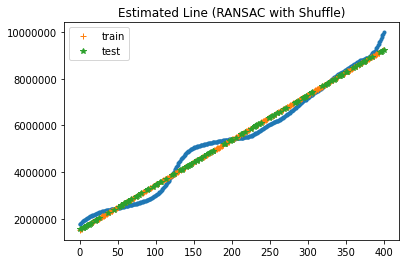

In [334]:
plt.figure()
plt.plot(X, y.reshape(-1,), '.')
plt.plot(np.sort(X_train, axis=0), pred, '+', label='train')
plt.plot(np.sort(X_test, axis=0), y_pred, '*', label='test')
plt.ticklabel_format(style = 'plain')
plt.title('Estimated Line (RANSAC with Shuffle)')
plt.legend()
plt.show()